#### Ciência de Dados com Python/IA - SENAI-DF - Vespertino - 12/08/2024 - Marcelo Pereira Avelino

#### `Análise de Risco de Crédito`
* Este notebook aborda o cenário de análise de risco de crédito conforme dados contidos no dataset `credit_risk_dataset`, disponível no [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).
* A análise explora as variáveis do dataset, realiza renomeação de colunas para facilitar o entendimento, e desenvolve uma análise exploratória de dados (EDA) para identificar padrões e insights relevantes para a avaliação de risco de crédito.

#### `Objetivo do Dataset`
* O arquivo `credit_risk_dataset.csv` é utilizado para análise de risco de crédito, fornecendo informações sobre as características financeiras e demográficas dos solicitantes de crédito. O objetivo é identificar padrões que possam prever a probabilidade de inadimplência.

#### `Objetivo do Dataset`
* O arquivo `credit_risk_dataset.csv` é utilizado para análise de risco de crédito, fornecendo informações sobre as características financeiras e demográficas dos solicitantes de crédito. O objetivo é identificar padrões que possam prever a probabilidade de inadimplência.

#### `Pré-Requisitos para análise dos dados`
* Ativar a .venv (Ambiente Virtual): Cria um ambiente isolado para garantir que as bibliotecas instaladas não afetem outros projetos.
    * Comando: source .venv\Scripts\activate (Windows).

In [117]:
## Instalar pandas para manipular e analisar dados em formato tabular (DataFrames).
! pip install pandas

# Instalar matplotlib para criar gráficos e visualizações dos dados
! pip install matplotlib

# Instalar numpy para realizar operações matemáticas e manipulação de arrays numéricos
! pip install numpy

# Instalar scipy para cálculos matemáticos e estatísticos avançados
! pip install scipy

# Instalar scikit-learn para criação de modelos de machine learning e análise de dados
! pip install scikit-learn

In [118]:
# 3. Importando as Bibliotecas Necessárias

import pandas as pd  # Importa a biblioteca pandas, usada para manipulação e análise de dados em tabelas
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib, usada para criar gráficos e visualizações
import numpy as np  # Importa a biblioteca numpy, usada para operações matemáticas e manipulação de arrays numéricos
from scipy import stats  # Importa o módulo stats da biblioteca scipy, usado para funções e cálculos estatísticos
from sklearn.ensemble import RandomForestClassifier  # Importa o RandomForestClassifier para análise de importância das variáveis
from sklearn.model_selection import train_test_split  # Importa a função train_test_split para dividir os dados em treino e teste

### `Apresentando e carregando os Dados`

In [40]:
# Definindo o caminho do arquivo CSV na variável 'url'
url = "dataset/credit_risk_dataset.csv"  # Especifica o local do arquivo de dados

# Lendo o arquivo CSV e armazenando os dados em um DataFrame chamado df_credito
df_credito = pd.read_csv(url)  # Carrega os dados do arquivo CSV em um DataFrame, uma estrutura de dados do pandas

# Exibindo as primeiras linhas do DataFrame 'df_credito'
df_credito.head()  # Mostra as primeiras 5 linhas do DataFrame para dar uma visão geral dos dados

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### `Renomeando as Colunas para Português`

* É necessário que as colunas sejam renomeadas de inglês para português para facilitar o entendimento e a manipulação dos dados.

In [41]:
# Exibindo a estrutura das colunas atuais.
df_credito.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [49]:
# Renomeando as Colunas para Português
novos_nomes = {  # Cria um dicionário com mapeamento das colunas de inglês para português
    'person_age': 'idade_pessoa',  # Renomeia 'person_age' para 'idade_pessoa'
    'person_income': 'renda_pessoa',  # Renomeia 'person_income' para 'renda_pessoa'
    'person_home_ownership': 'propriedade_residencial',  # Renomeia 'person_home_ownership' para 'propriedade_residencial'
    'person_emp_length': 'tempo_emprego',  # Renomeia 'person_emp_length' para 'tempo_emprego'
    'loan_intent': 'intencao_emprestimo',  # Renomeia 'loan_intent' para 'intencao_emprestimo'
    'loan_amnt': 'valor_emprestimo',  # Renomeia 'loan_amnt' para 'valor_emprestimo'
    'loan_status': 'status_emprestimo',  # Renomeia 'loan_status' para 'status_emprestimo'
    'loan_percent_income': 'percentual_renda_emprestimo',  # Renomeia 'loan_percent_income' para 'percentual_renda_emprestimo'
    'cb_person_default_on_file': 'registro_inadimplencia',  # Renomeia 'cb_person_default_on_file' para 'registro_inadimplencia'
    'cb_person_cred_hist_length': 'tempo_historico_credito',  # Renomeia 'cb_person_cred_hist_length' para 'tempo_historico_credito'
    'loan_grade': 'grau_emprestimo',  # Renomeia 'loan_grade' para 'grau_emprestimo'
    'loan_purpose': 'proposito_emprestimo'  # Renomeia 'loan_purpose' para 'proposito_emprestimo'
}

# Renomeia as colunas do DataFrame usando o dicionário criado
# O método rename() é utilizado para alterar os nomes das colunas do DataFrame.
# O argumento columns=novos_nomes especifica que as colunas devem ser renomeadas de acordo com o dicionário 'novos_nomes'.
# `inplace=True`` faz com que a modificação seja aplicada diretamente ao DataFrame original 'df_credito'.
# Se `inplace=False` (ou se o argumento não for especificado), o método retorna um novo DataFrame com as colunas renomeadas, mas não altera o DataFrame original.
df_credito.rename(columns=novos_nomes, inplace=True)

# Exibe as primeiras linhas do DataFrame após renomear as colunas
df_credito.head()

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,grau_emprestimo,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### `Utilização da coluna loan_status`

* A coluna `loan_status`, que foi renomeada para `status_emprestimo`, indica o status do pagamento do empréstimo.
Essa coluna é crucial para a análise de risco de crédito, pois ela reflete se o empréstimo foi pago ou se houve inadimplência. Essa informação é essencial para identificar padrões de comportamento de pagamento entre os diferentes solicitantes e avaliar o risco associado a novos empréstimos.

In [51]:
# Exibindo os valores únicos presentes na coluna 'status_emprestimo'
# O método unique() retorna um array dos valores únicos (não repetidos) encontrados na coluna especificada.
# Isso é útil para identificar todas as categorias ou status diferentes que existem na coluna 'status_emprestimo'.
valores_unicos = df_credito['status_emprestimo'].unique()

# Exibindo os valores únicos para verificar os diferentes status de empréstimo presentes no DataFrame
valores_unicos

array([1, 0])

In [52]:
# Exibindo as primeiras linhas da coluna 'status_emprestimo'
df_credito[['status_emprestimo']].head()

,status_emprestimo
0,1
1,0
2,1
3,1
4,1


In [53]:
# Contando a frequência de cada status de empréstimo
df_credito['status_emprestimo'].value_counts()

status_emprestimo
0    25473
1     7108
Name: count, dtype: int64

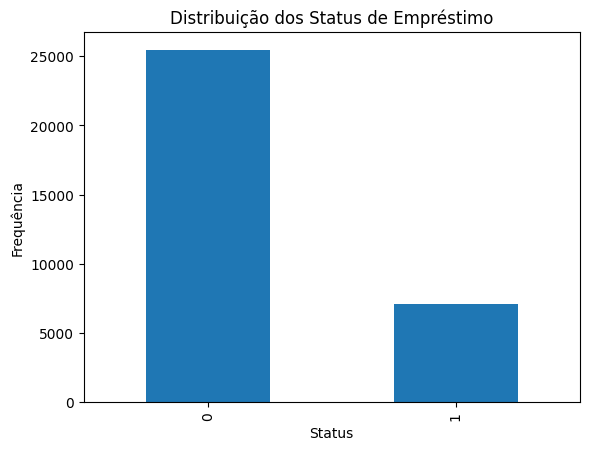

In [46]:
# Visualizando a distribuição dos status de empréstimo com um gráfico de barras
df_credito['status_emprestimo'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Status de Empréstimo')
plt.xlabel('Status')
plt.ylabel('Frequência')
plt.show()

#### `Explorando funções básicas da Biblioteca Pandas`

In [54]:
# Exibe as primeiras 5 linhas do DataFrame para uma visão geral dos dados
df_credito.head()

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,grau_emprestimo,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [55]:
# Exibe as últimas 5 linhas do DataFrame
df_credito.tail()

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,grau_emprestimo,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [56]:
# Exibe a quantidade de linhas e colunas do DataFrame
df_credito.shape  # O método shape retorna uma tupla com o número de linhas e colunas do DataFrame

(32581, 12)

In [57]:
# Exibe o resumo estatístico das colunas numéricas do DataFrame
df_credito.describe()  # O método describe() gera estatísticas descritivas como média, desvio padrão, valores mínimos e máximos

,idade_pessoa,renda_pessoa,tempo_emprego,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,tempo_historico_credito
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [58]:
# Exibe a lista de colunas do DataFrame
df_credito.columns  # O atributo columns retorna o índice das colunas do DataFrame

Index(['idade_pessoa', 'renda_pessoa', 'propriedade_residencial',
       'tempo_emprego', 'intencao_emprestimo', 'grau_emprestimo',
       'valor_emprestimo', 'loan_int_rate', 'status_emprestimo',
       'percentual_renda_emprestimo', 'registro_inadimplencia',
       'tempo_historico_credito'],
      dtype='object')

#### `Análise exploratória (EDA) - Qualitativa`

* A análise exploratória de dados (EDA) qualitativa envolve o exame das características categóricas dos dados. Essas características podem ser divididas em dois tipos principais: nominais e ordinais.

### 1. Variáveis Nominais

* **Definição:** Representam categorias sem ordem ou hierarquia.

* **Exemplos no DataFrame:**
  - `intencao_emprestimo`: Finalidade do empréstimo (e.g., "Educação", "Carro").
  - `propriedade_residencial`: Tipo de posse da residência (e.g., "Aluguel", "Própria").

* **Análise:** 
  - **Distribuição de Frequência:** Contar quantas vezes cada categoria aparece para identificar as mais comuns.

In [63]:
# Contagem das categorias na coluna 'intencao_emprestimo'
df_credito['intencao_emprestimo'].value_counts()

# O código conta quantas vezes cada categoria (como "Educação", "Carro", etc.) aparece na coluna 'intencao_emprestimo'.
# 'value_counts()' é usado para mostrar a frequência de cada valor único na coluna, ajudando a identificar as finalidades mais comuns para empréstimos.

intencao_emprestimo
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [64]:
# Contagem das categorias na coluna 'propriedade_residencial'
df_credito['propriedade_residencial'].value_counts()

# Este código faz o mesmo que o anterior, mas para a coluna 'propriedade_residencial' e conta quantas vezes cada tipo de posse residencial (como "Aluguel", "Própria", "Hipoteca") aparece, mostrando a distribuição dessas categorias.

propriedade_residencial
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

### 2. Variáveis Ordinais

* **Definição:** Representam categorias que têm uma ordem ou hierarquia natural.

* **Exemplos no DataFrame:**
    - `status_emprestimo`: Reflete uma progressão de risco (e.g., "Totalmente Pago", "Em Dia", "Atrasado").
    - `registro_inadimplencia`: Indica "Sim" ou "Não", com "Sim" representando maior risco.

* **Análise**:
    - **Distribuição de Frequência:** Contar quantas vezes cada categoria aparece para entender a distribuição e a hierarquia entre as categorias.

In [68]:
# Analisando a variável ordinal 'status_emprestimo'
print("Distribuição de status_emprestimo:")
print(df_credito['status_emprestimo'].value_counts())

# Explicação:
# - O código acima conta quantas vezes cada categoria de 'status_emprestimo' aparece no DataFrame.
# - Isso ajuda a entender a distribuição dos diferentes status de empréstimo, que podem refletir níveis de risco diferentes, como "Totalmente Pago", "Em Dia", "Atrasado", etc.

Distribuição de status_emprestimo:
status_emprestimo
0    25473
1     7108
Name: count, dtype: int64


In [69]:
# Analisando a variável ordinal 'registro_inadimplencia'
print("Distribuição de registro_inadimplencia:")
print(df_credito['registro_inadimplencia'].value_counts())

# Explicação:
# - O código acima conta quantas vezes cada categoria de 'registro_inadimplencia' aparece no DataFrame.
# - Aqui, "Sim" e "Não" indicam se há um histórico de inadimplência, com "Sim" representando um maior risco de crédito.

Distribuição de registro_inadimplencia:
registro_inadimplencia
N    26836
Y     5745
Name: count, dtype: int64


In [80]:
# Visualização com gráfico de barras (exemplo para intencao_emprestimo)
import matplotlib.pyplot as plt

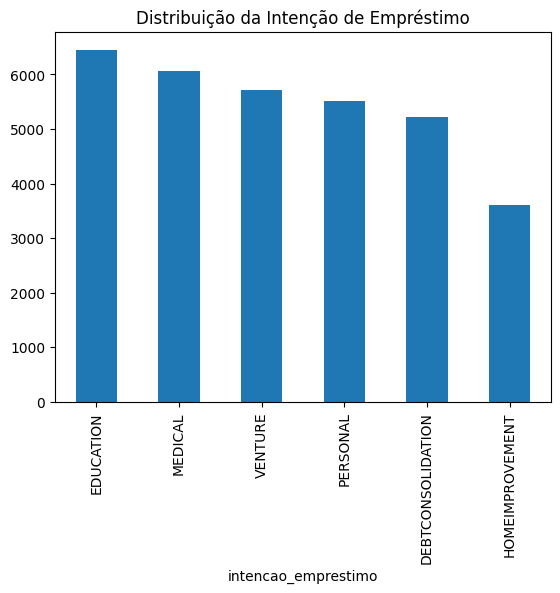

In [73]:
df_credito['intencao_emprestimo'].value_counts().plot(kind='bar', title='Distribuição da Intenção de Empréstimo')
plt.show()

#### `Análise exploratória (EDA) - Quantitativas`

1. **Variáveis Discretas**

    * **Definição**: Variáveis discretas são aquelas que assumem valores contáveis e distintos, ou seja, elas só podem tomar valores inteiros e não fracionários. No contexto do dataset de risco de crédito, um exemplo de variável discreta pode ser o número de anos de emprego da pessoa (tempo_emprego).

* **Exemplo no DataFrame:**
  - `tempo_emprego`: Representa o número de anos de emprego da pessoa. Como se trata de uma contagem de anos, essa variável é discreta, pois não pode assumir valores fracionários.

* **Análise:**
  - **Distribuição de Frequência:** Podemos contar a frequência de cada valor para entender a distribuição dos anos de emprego entre os indivíduos no dataset.

In [72]:
# Exibindo um resumo estatístico da variável 'tempo_emprego' (discreta)
df_credito['tempo_emprego'].describe()

# O método describe() fornece estatísticas resumidas para a coluna 'tempo_emprego', que é uma variável discreta. Isso inclui contagem, média, desvio padrão, mínimo, máximo e os valores dos quartis (25%, 50%, 75%).

count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: tempo_emprego, dtype: float64

<Axes: title={'center': 'Distribuição do Tempo de Emprego'}, xlabel='tempo_emprego'>

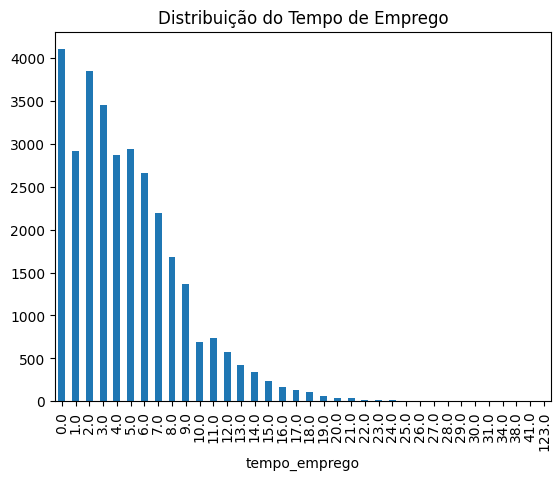

In [74]:
# Exibindo a distribuição da variável 'tempo_emprego'
df_credito['tempo_emprego'].value_counts().sort_index().plot(kind='bar', title='Distribuição do Tempo de Emprego')

### 2. **Variáveis Contínuas**

* **Definição**: Variáveis contínuas são aquelas que podem assumir qualquer valor em um intervalo contínuo, incluindo valores fracionários.

* **Exemplo no DataFrame:**
- `renda_pessoa`: Representa a renda da pessoa, que pode ter qualquer valor dentro de um intervalo, incluindo valores decimais.

* **Análise:**
* - Exibindo um resumo estatístico da variável 'renda_pessoa' (contínua)

In [75]:
# Exibindo um resumo estatístico da variável 'renda_pessoa' (contínua)

df_credito['renda_pessoa'].describe()

# O método describe() fornece estatísticas resumidas para a coluna 'renda_pessoa', que é uma variável contínua. Isso inclui contagem, média, desvio padrão, mínimo, máximo e os valores dos quartis (25%, 50%, 75%).

count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: renda_pessoa, dtype: float64

<Axes: title={'center': 'Distribuição da Renda das Pessoas'}, ylabel='Frequency'>

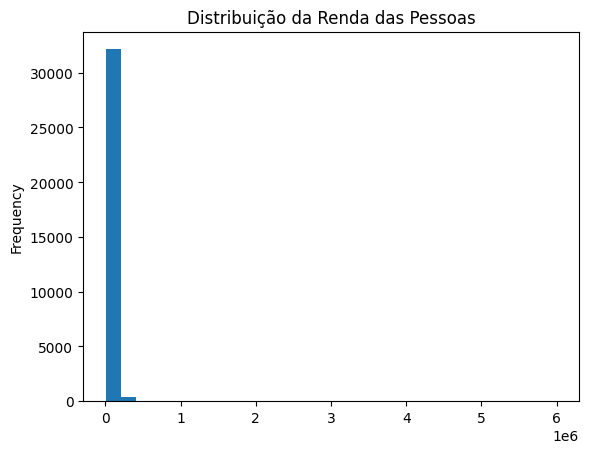

In [76]:
# Exibindo a distribuição da variável 'renda_pessoa' por meio de gráfico
df_credito['renda_pessoa'].plot(kind='hist', bins=30, title='Distribuição da Renda das Pessoas')

# plot(kind='hist'): Cria um histograma, que é um tipo de gráfico ideal para visualizar a distribuição 
# de uma variável contínua. 
# bins=30: Define o número de "barras" ou "intervalos" do histograma.
# title='Distribuição da Renda das Pessoas': Adiciona um título ao gráfico.

#### `Quartil, Percentil (%), Mediana e Média no Contexto do Dataset`

`Quartil`

* **Conceito:** Divide os dados ordenados em quatro partes iguais, cada uma contendo 25% dos valores.

`Percentil`

* **Conceito:** Divide os dados ordenados em 100 partes iguais, cada percentil representa 1% dos valores.

`Mediana`

* **Conceito:** É o valor que separa os dados ordenados ao meio, sendo o ponto central dos dados.

`Média`

* **Conceito:** É a soma de todos os valores dividida pelo número total de valores, representando o valor médio.

In [84]:
# Quartil
# No dataset de risco de crédito, os quartis podem ser utilizados para entender a distribuição de variáveis como 'renda_pessoa'.
# Por exemplo, o primeiro quartil (Q1) representa o ponto abaixo do qual 25% dos valores da 'renda_pessoa' se encontram.

# Calculando os quartis da coluna 'renda_pessoa'
quartis = df_credito['renda_pessoa'].quantile([0.25, 0.5, 0.75])

# Exibindo os valores dos quartis calculados
quartis

# A função quantile() do pandas é usada para calcular os quartis. Passando uma lista [0.25, 0.5, 0.75], estamos pedindo para calcular o primeiro quartil (Q1), a mediana (Q2), e o terceiro quartil (Q3).
# Q1 (0.25) indica que 25% das pessoas têm uma renda abaixo deste valor.
# Q2 (0.5), ou mediana, indica que 50% das pessoas têm uma renda abaixo deste valor.
# Q3 (0.75) indica que 75% das pessoas têm uma renda abaixo deste valor.
# 
# A ausência do Q4 (0.100) é porque, por definição, o Q4 representa o valor máximo da distribuição, ou seja, 100% das pessoas têm uma renda abaixo ou igual ao valor máximo, o que não oferece uma nova informação além do que já é representado pelo valor máximo da distribuição.

0.25    38500.0
0.50    55000.0
0.75    79200.0
Name: renda_pessoa, dtype: float64

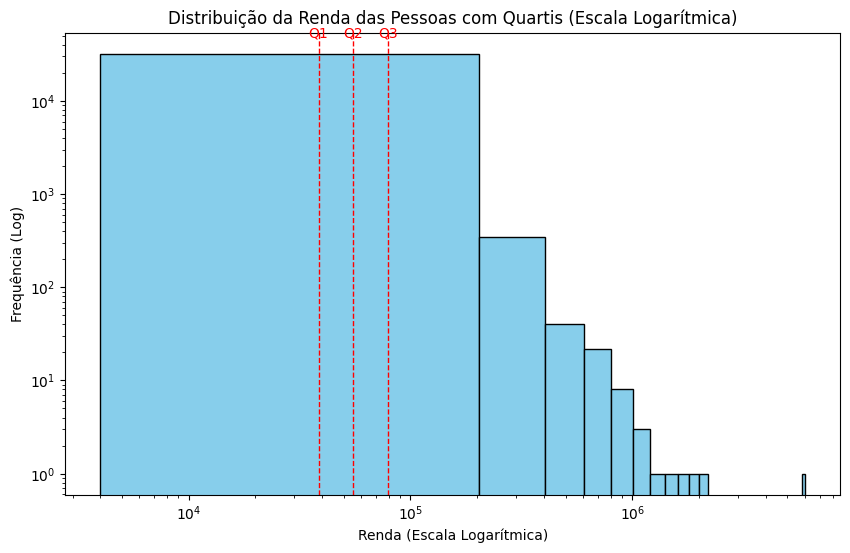

In [85]:
# Calculando os quartis da coluna 'renda_pessoa'
quartis = df_credito['renda_pessoa'].quantile([0.25, 0.5, 0.75])

# Criando o gráfico com escala logarítmica no eixo X
plt.figure(figsize=(10, 6))
plt.hist(df_credito['renda_pessoa'], bins=30, color='skyblue', edgecolor='black', log=True)  # Histograma da renda_pessoa

# Adicionando linhas verticais para os quartis
for q in quartis:
    plt.axvline(q, color='red', linestyle='dashed', linewidth=1)

# Adicionando o texto para os quartis
for i, q in enumerate(quartis):
    plt.text(q, plt.gca().get_ylim()[1]*0.9, f'Q{i+1}', color='red', ha='center')

# Configurando os títulos e legendas
plt.title('Distribuição da Renda das Pessoas com Quartis (Escala Logarítmica)')
plt.xlabel('Renda (Escala Logarítmica)')
plt.ylabel('Frequência (Log)')
plt.xscale('log')  # Define a escala logarítmica para o eixo X
plt.show()

# Este gráfico usa uma escala logarítmica no eixo X para expandir a área onde a maioria dos dados está concentrada.
# A escala logarítmica ajuda a visualizar melhor os dados que estão concentrados em uma faixa pequena de valores.

In [86]:
# Percentil
# No dataset de risco de crédito, os percentis podem ser utilizados para entender a distribuição de variáveis como 'renda_pessoa'.
# Por exemplo, o percentil 25% representa o ponto abaixo do qual 25% dos valores da 'renda_pessoa' se encontram.

# Calculando os percentis da coluna 'renda_pessoa'
percentis = df_credito['renda_pessoa'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

# Exibindo os valores dos percentis calculados
percentis

# A função quantile() do pandas é usada para calcular os percentis.
# Passando uma lista [0.1, 0.25, 0.5, 0.75, 0.9], estamos pedindo para calcular os percentis 10%, 25%, 50% (mediana), 75%, e 90%.
# Por exemplo, o percentil 25% (0.25) indica que 25% das pessoas têm uma renda abaixo deste valor.

0.10     28590.0
0.25     38500.0
0.50     55000.0
0.75     79200.0
0.90    110004.0
Name: renda_pessoa, dtype: float64

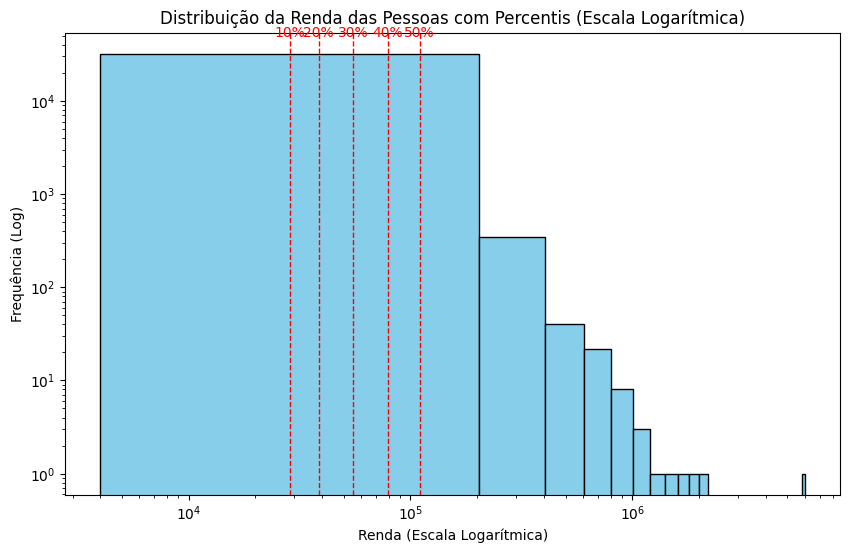

In [87]:
# Calculando os percentis da coluna 'renda_pessoa'
percentis = df_credito['renda_pessoa'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

# Criando o gráfico com escala logarítmica no eixo X
plt.figure(figsize=(10, 6))
plt.hist(df_credito['renda_pessoa'], bins=30, color='skyblue', edgecolor='black', log=True)  # Histograma da renda_pessoa

# Adicionando linhas verticais para os percentis
for p in percentis:
    plt.axvline(p, color='red', linestyle='dashed', linewidth=1)

# Adicionando o texto para os percentis
for i, p in enumerate(percentis):
    plt.text(p, plt.gca().get_ylim()[1]*0.9, f'{int(i+1)*10}%', color='red', ha='center')

# Configurando os títulos e legendas
plt.title('Distribuição da Renda das Pessoas com Percentis (Escala Logarítmica)')
plt.xlabel('Renda (Escala Logarítmica)')
plt.ylabel('Frequência (Log)')
plt.xscale('log')  # Define a escala logarítmica para o eixo X
plt.show()

# Este gráfico usa uma escala logarítmica no eixo X para expandir a área onde a maioria dos dados está concentrada.
# A escala logarítmica ajuda a visualizar melhor os dados que estão concentrados em uma faixa pequena de valores.
# As linhas vermelhas indicam onde se encontram os percentis calculados (10%, 25%, 50%, 75%, e 90%).

In [88]:
# Mediana
# A mediana é o valor central de um conjunto de dados ordenados, ou seja, é o ponto em que metade dos valores estão abaixo e metade estão acima.

# Calculando a mediana da coluna 'renda_pessoa'
mediana_renda = df_credito['renda_pessoa'].median()

# Exibindo o valor da mediana calculada
mediana_renda

# A função median() do pandas é usada para calcular a mediana de uma série de dados.
# A mediana é particularmente útil quando os dados têm outliers (valores muito altos ou muito baixos) que podem distorcer a média.
# No contexto do dataset de risco de crédito, a mediana da 'renda_pessoa' representa o valor da renda em que 50% das pessoas têm uma renda abaixo desse valor e 50% têm uma renda acima.

np.float64(55000.0)

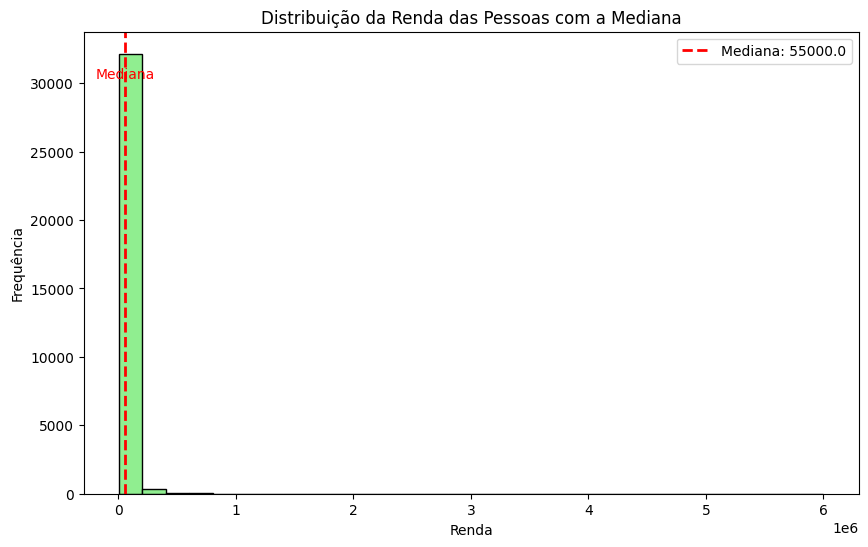

In [89]:
# Calculando a mediana da coluna 'renda_pessoa'
mediana_renda = df_credito['renda_pessoa'].median()

# Criando o gráfico com histograma
plt.figure(figsize=(10, 6))
plt.hist(df_credito['renda_pessoa'], bins=30, color='lightgreen', edgecolor='black')  # Histograma da renda_pessoa

# Adicionando uma linha vertical para a mediana
plt.axvline(mediana_renda, color='red', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_renda}')

# Adicionando o texto para a mediana
plt.text(mediana_renda, plt.gca().get_ylim()[1]*0.9, 'Mediana', color='red', ha='center')

# Configurando os títulos e legendas
plt.title('Distribuição da Renda das Pessoas com a Mediana')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

# Este gráfico mostra a distribuição da variável 'renda_pessoa' com a mediana indicada por uma linha vermelha pontilhada.
# A linha da mediana ajuda a visualizar o ponto em que 50% das observações têm valores abaixo e 50% têm valores acima.

In [90]:
# Média
# No dataset de risco de crédito, a média da variável 'renda_pessoa' representa o valor médio de renda das pessoas no dataset.

# Calculando a média da coluna 'renda_pessoa'
media_renda = df_credito['renda_pessoa'].mean()

# Exibindo a média calculada
media_renda

# A função mean() do pandas é usada para calcular a média dos valores na coluna 'renda_pessoa'.
# A média é uma medida de tendência central que representa o valor médio de todos os dados na coluna.
# No contexto do dataset, a média nos dá uma ideia do valor típico de renda entre as pessoas analisadas.

np.float64(66074.84846996715)

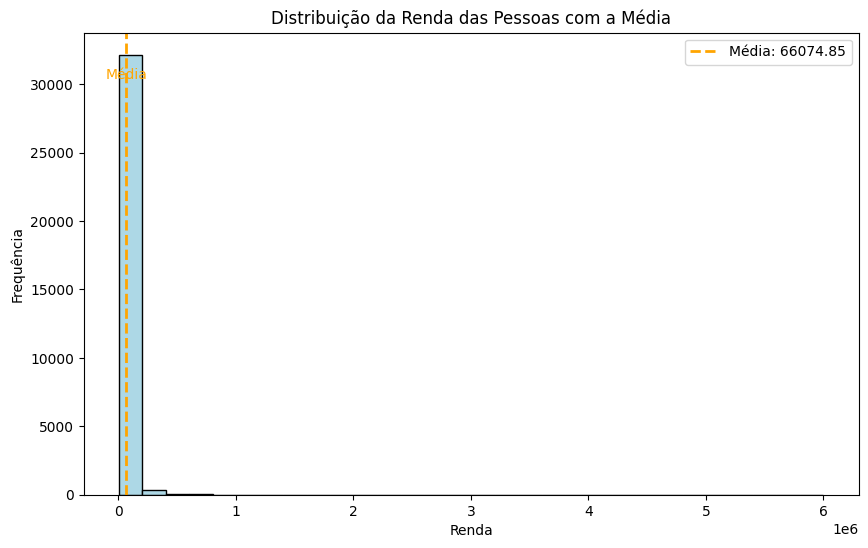

In [91]:
# Criando o gráfico com histograma
plt.figure(figsize=(10, 6))
plt.hist(df_credito['renda_pessoa'], bins=30, color='lightblue', edgecolor='black')  # Histograma da renda_pessoa

# Adicionando uma linha vertical para a média
plt.axvline(media_renda, color='orange', linestyle='dashed', linewidth=2, label=f'Média: {media_renda:.2f}')

# Adicionando o texto para a média
plt.text(media_renda, plt.gca().get_ylim()[1]*0.9, 'Média', color='orange', ha='center')

# Configurando os títulos e legendas
plt.title('Distribuição da Renda das Pessoas com a Média')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

# Este gráfico mostra a distribuição da variável 'renda_pessoa' com a média indicada por uma linha laranja pontilhada.
# A linha da média ajuda a visualizar o valor médio da renda das pessoas no dataset.

#### `Quais pessoas ganham acima da média?`

Para responder a essa pergunta, vamos primeiro calcular a média da renda das pessoas (renda_pessoa). Em seguida, filtraremos o DataFrame para encontrar as pessoas cuja renda é maior que a média.

In [94]:
# Calculando a média da coluna 'renda_pessoa'
media_renda = df_credito['renda_pessoa'].mean()

# Cálculo da média da renda (renda_pessoa) para determinar o valor médio que as pessoas ganham no dataset.

In [95]:
# Filtrando as pessoas que ganham acima da média
pessoas_acima_media = df_credito[df_credito['renda_pessoa'] > media_renda]

# Filtramos o DataFrame original usando uma condição que verifica quais pessoas têm renda maior que a média.

In [97]:
# Exibindo as pessoas que ganham acima da média
pessoas_acima_media

# O resultado é um novo DataFrame contendo apenas as pessoas que ganham acima da média.

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,grau_emprestimo,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4
12,23,95000,RENT,2.0,VENTURE,A,35000,7.90,1,0.37,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32570,58,72000,RENT,5.0,HOMEIMPROVEMENT,B,4500,NaN,0,0.06,N,23
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


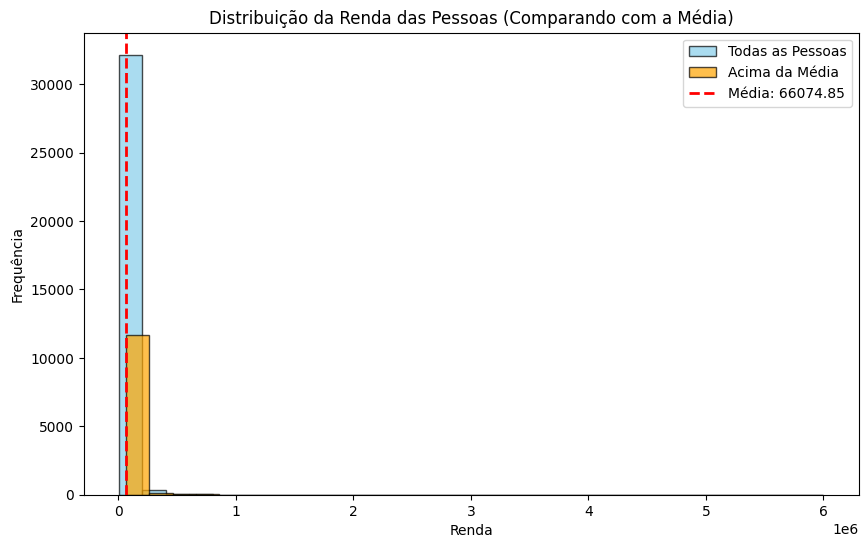

In [104]:
# Este gráfico ajuda a visualizar a distribuição geral da renda e destaca as pessoas que ganham acima da média, tornando mais fácil comparar essas duas populações.
# Calculando a média da renda
media_renda = df_credito['renda_pessoa'].mean()

# Filtrando as pessoas que ganham acima da média
acima_da_media = df_credito[df_credito['renda_pessoa'] > media_renda]

# Criando o gráfico de distribuição da renda
plt.figure(figsize=(10, 6))
plt.hist(df_credito['renda_pessoa'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Todas as Pessoas')
plt.hist(acima_da_media['renda_pessoa'], bins=30, color='orange', edgecolor='black', alpha=0.7, label='Acima da Média')
plt.axvline(media_renda, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_renda:.2f}')
plt.title('Distribuição da Renda das Pessoas (Comparando com a Média)')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# O histograma em azul mostra a distribuição de renda de todas as pessoas.
# O histograma em laranja destaca as pessoas que ganham acima da média.
# A linha vermelha tracejada indica a média da renda.

#### `Quais pessoas têm um risco baixo e ainda assim pedem empréstimos?`

* Para responder a essa pergunta, precisamos identificar a coluna que representa o risco (geralmente baseada no status_emprestimo ou uma coluna semelhante). Em seguida, filtraremos as pessoas que têm um risco baixo e verificaremos se elas pedem empréstimos.

* Assumindo que a coluna status_emprestimo indica o risco (onde 0 é risco baixo e 1 é risco alto):

In [99]:
# Filtrando o DataFrame para encontrar as pessoas com risco baixo (status_emprestimo == 0) e que ainda assim pedem empréstimos
risco_baixo_pedem_emprestimo = df_credito[(df_credito['status_emprestimo'] == 0) & (df_credito['valor_emprestimo'] > 0)]

# A condição (df_credito['status_emprestimo'] == 0) filtra o DataFrame para manter apenas as pessoas com risco baixo.
# A segunda condição (df_credito['valor_emprestimo'] > 0) verifica se essas pessoas estão pedindo empréstimos.
# O operador & é usado para combinar essas duas condições, resultando em um DataFrame que contém apenas as pessoas que têm risco baixo e que pedem empréstimos.

In [100]:
# Exibindo as primeiras linhas do DataFrame filtrado
risco_baixo_pedem_emprestimo.head()

,idade_pessoa,renda_pessoa,propriedade_residencial,tempo_emprego,intencao_emprestimo,grau_emprestimo,valor_emprestimo,loan_int_rate,status_emprestimo,percentual_renda_emprestimo,registro_inadimplencia,tempo_historico_credito
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4


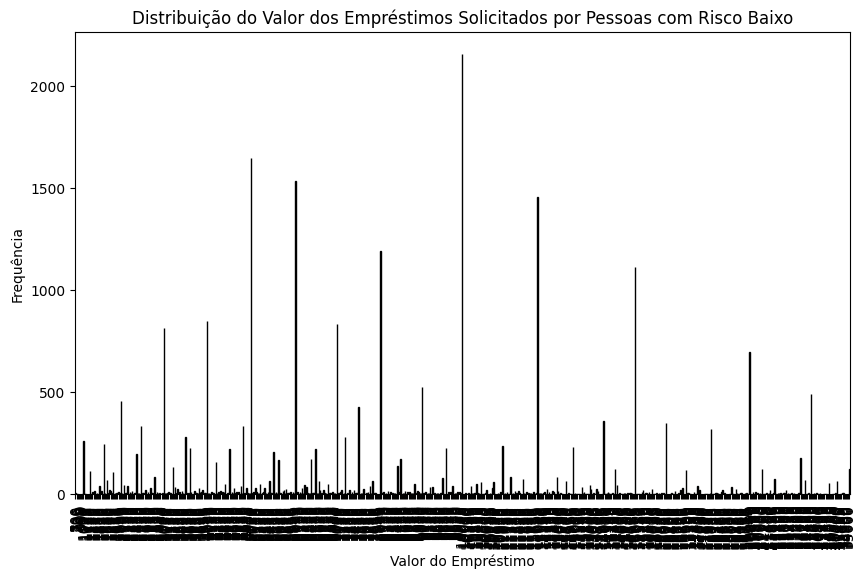

In [101]:
# Exemplo de gráfico de barras para visualizar a quantidade de empréstimos solicitados por pessoas com risco baixo.

# Contando a frequência de valores de empréstimos solicitados por pessoas com risco baixo
emprestimos_por_valor = risco_baixo_pedem_emprestimo['valor_emprestimo'].value_counts().sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
emprestimos_por_valor.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição do Valor dos Empréstimos Solicitados por Pessoas com Risco Baixo')
plt.xlabel('Valor do Empréstimo')
plt.ylabel('Frequência')
plt.show()

# O método value_counts() é usado para contar quantas vezes cada valor de empréstimo aparece para pessoas com risco baixo.
# O gráfico de barras é criado com plot(kind='bar') para visualizar a frequência dos diferentes valores de empréstimos.

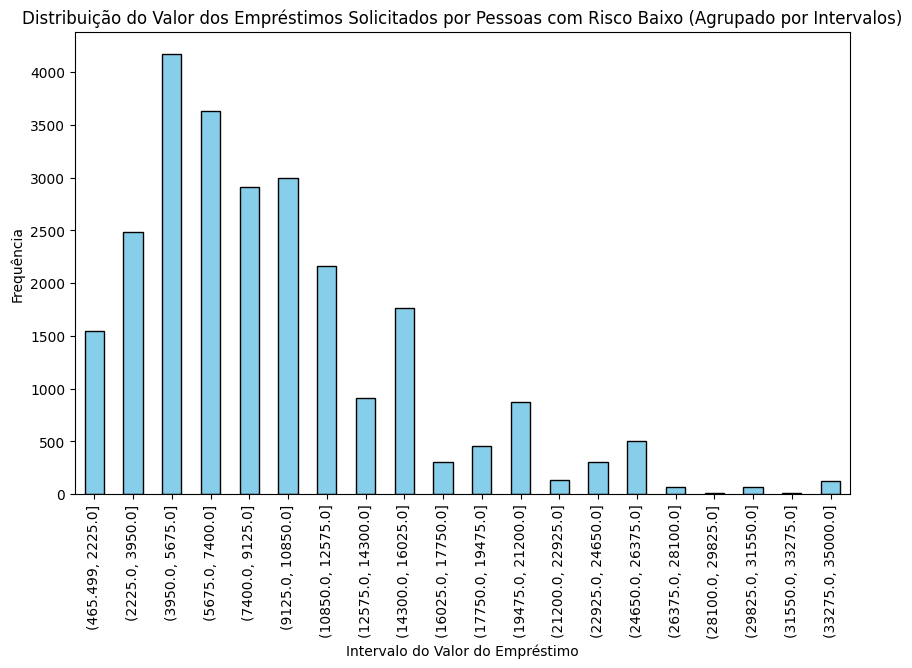

In [102]:
# Agrupando os valores de empréstimo em intervalos para melhorar a visualização
emprestimos_por_intervalo = risco_baixo_pedem_emprestimo['valor_emprestimo'].value_counts(bins=20).sort_index()

# Criando o gráfico de barras com os intervalos
plt.figure(figsize=(10, 6))
emprestimos_por_intervalo.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição do Valor dos Empréstimos Solicitados por Pessoas com Risco Baixo (Agrupado por Intervalos)')
plt.xlabel('Intervalo do Valor do Empréstimo')
plt.ylabel('Frequência')
plt.show()

# O parâmetro bins=20 agrupa os valores de empréstimos em 20 intervalos, facilitando a visualização.
# O gráfico de barras é criado com plot(kind='bar') para mostrar a frequência dos valores de empréstimos dentro de cada intervalo.

`Gráfico de Barras: Distribuição de Risco de Empréstimo (Loan Status)`

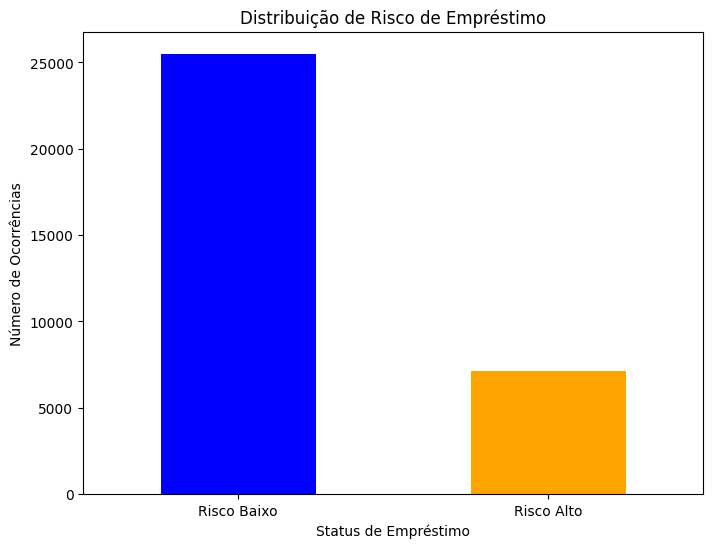

In [106]:
# Contando o número de ocorrências de cada status de empréstimo
status_count = df_credito['status_emprestimo'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
status_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuição de Risco de Empréstimo')
plt.xlabel('Status de Empréstimo')
plt.ylabel('Número de Ocorrências')
plt.xticks(ticks=[0, 1], labels=['Risco Baixo', 'Risco Alto'], rotation=0)
plt.show()

# Explicação:
# - Este gráfico de barras mostra a distribuição dos status de empréstimo no dataset.
# - Cada barra representa o número de pessoas com risco baixo ou risco alto de inadimplência.


`Histograma: Distribuição da Idade das Pessoas`

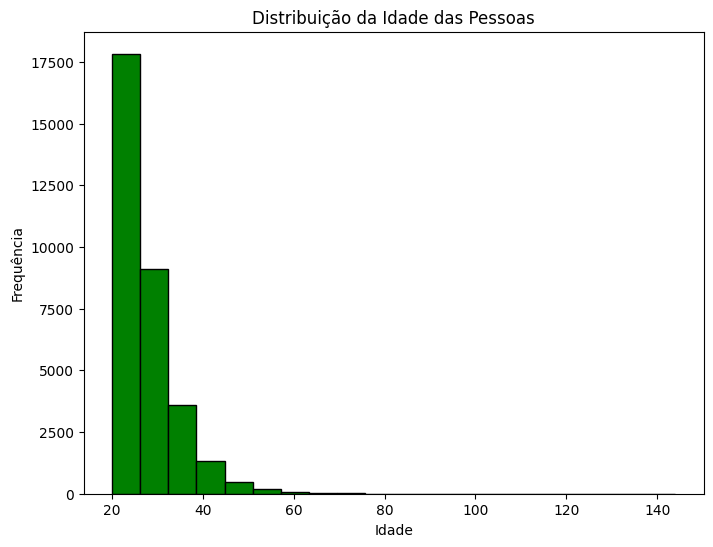

In [99]:
# Criando um histograma para a idade das pessoas
plt.figure(figsize=(8, 6))
plt.hist(df_credito['idade_pessoa'], bins=20, color='green', edgecolor='black')
plt.title('Distribuição da Idade das Pessoas')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Explicação:
# - Este histograma mostra a distribuição das idades das pessoas no dataset.
# - Ele ajuda a entender a faixa etária predominante entre os solicitantes de empréstimo.

`Gráfico de Barras: Distribuição de Propriedade Residencial`

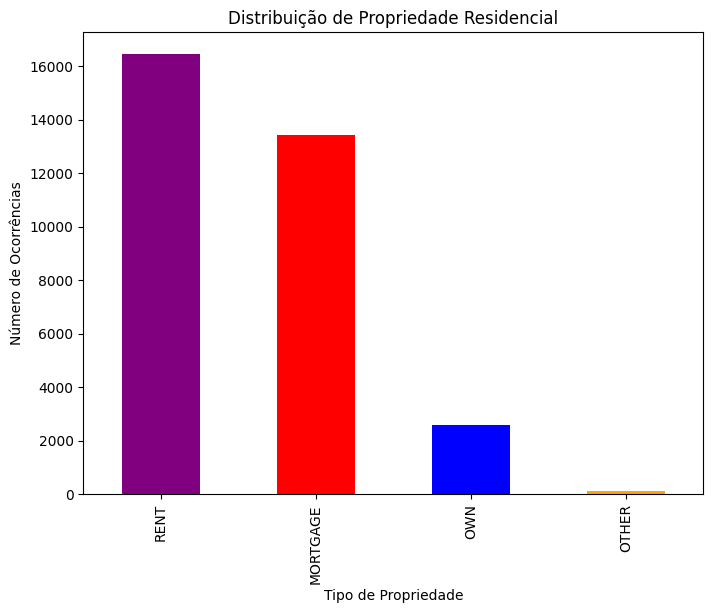

In [108]:
# Contando o número de ocorrências de cada tipo de propriedade residencial
residencia_count = df_credito['propriedade_residencial'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
residencia_count.plot(kind='bar', color=['purple', 'red', 'blue', 'orange'])
plt.title('Distribuição de Propriedade Residencial')
plt.xlabel('Tipo de Propriedade')
plt.ylabel('Número de Ocorrências')
plt.show()

# Este gráfico de barras mostra a distribuição dos diferentes tipos de propriedade residencial.
# Ele ajuda a entender quais tipos de propriedade são mais comuns entre os solicitantes de crédito.

#### `Quais as Colunas Que Mais Impactam o Risco?`

* Para identificar as colunas que mais impactam no risco (representado pela coluna `status_emprestimo`), você pode realizar uma análise exploratória de dados (EDA) mais detalhada, utilizando métodos estatísticos e técnicas de machine learning.

* Algumas abordagens comuns incluem:
    * **Correlação**: Calcular a correlação entre as variáveis independentes (colunas) e a variável dependente (status_emprestimo). Isso ajuda a entender quais colunas têm uma relação mais forte com o risco.
    * **Feature Importance**: Utilizar algoritmos de machine learning (como Random Forest) para medir a importância de cada variável na predição do risco de crédito.

##### `Análise de Correlação`

* Valores mais próximos de 1 ou -1 indicam uma forte relação linear com o risco (status_emprestimo), enquanto valores próximos de 0 indicam pouca ou nenhuma correlação.
* Este gráfico ajuda a identificar visualmente quais variáveis têm a maior correlação com o status do empréstimo, permitindo uma análise mais clara dos fatores que impactam o risco de crédito.

In [112]:
# Seleciona apenas as colunas numéricas do DataFrame
df_numerico = df_credito.select_dtypes(include=[np.number])

# Calcula a correlação entre as colunas numéricas e o status do empréstimo
correlacao = df_numerico.corr()

# Exibindo a correlação entre 'status_emprestimo' e outras colunas
correlacao_com_risco = correlacao['status_emprestimo'].sort_values(ascending=False)
print(correlacao_com_risco)

status_emprestimo              1.000000
percentual_renda_emprestimo    0.379366
loan_int_rate                  0.335133
valor_emprestimo               0.105376
tempo_historico_credito       -0.015529
idade_pessoa                  -0.021629
tempo_emprego                 -0.082489
renda_pessoa                  -0.144449
Name: status_emprestimo, dtype: float64


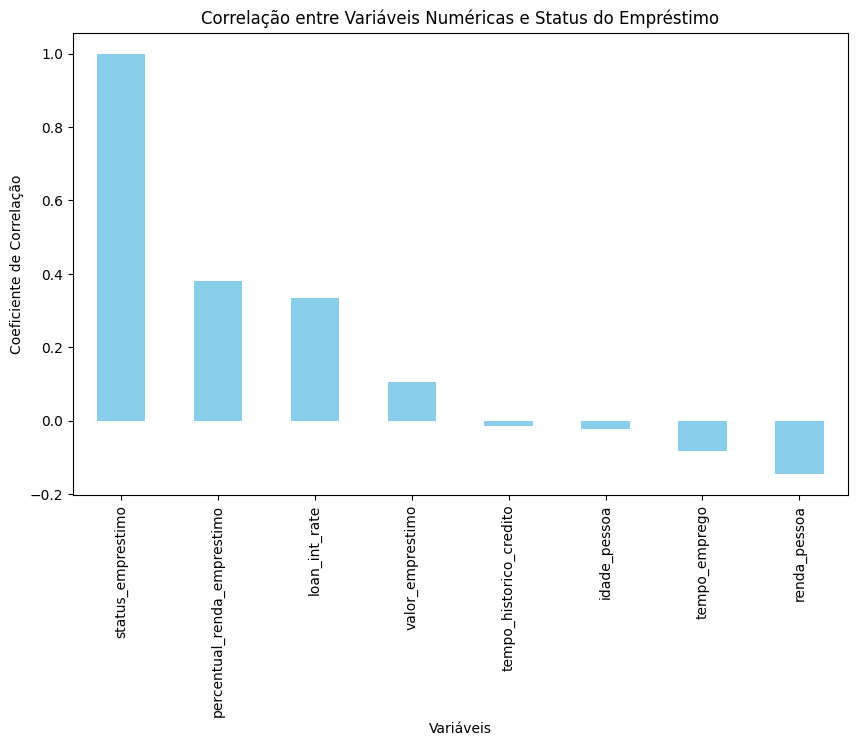

In [115]:
# Seleciona apenas as colunas numéricas do DataFrame
df_numerico = df_credito.select_dtypes(include=[np.number])

# Calcula a correlação entre as colunas numéricas e o status do empréstimo
correlacao = df_numerico.corr()

# Exibindo a correlação entre 'status_emprestimo' e outras colunas. 
# Calcula a correlação entre status_emprestimo e outras variáveis numéricas, ordenando de forma decrescente.
correlacao_com_risco = correlacao['status_emprestimo'].sort_values(ascending=False) 

# Plotando a correlação em um gráfico de barras
# plot(kind='bar', color='skyblue'): Cria um gráfico de barras onde o eixo X representa as variáveis numéricas e o eixo Y representa o coeficiente de correlação.
plt.figure(figsize=(10, 6))
correlacao_com_risco.plot(kind='bar', color='skyblue')
plt.title('Correlação entre Variáveis Numéricas e Status do Empréstimo')
plt.xlabel('Variáveis')
plt.ylabel('Coeficiente de Correlação')
plt.show()

#### `Feature Importance com Random Forest`
* Este gráfico ajudará a identificar quais variáveis mais influenciam o modelo ao prever o status do empréstimo. As variáveis mais importantes aparecem no topo do gráfico.

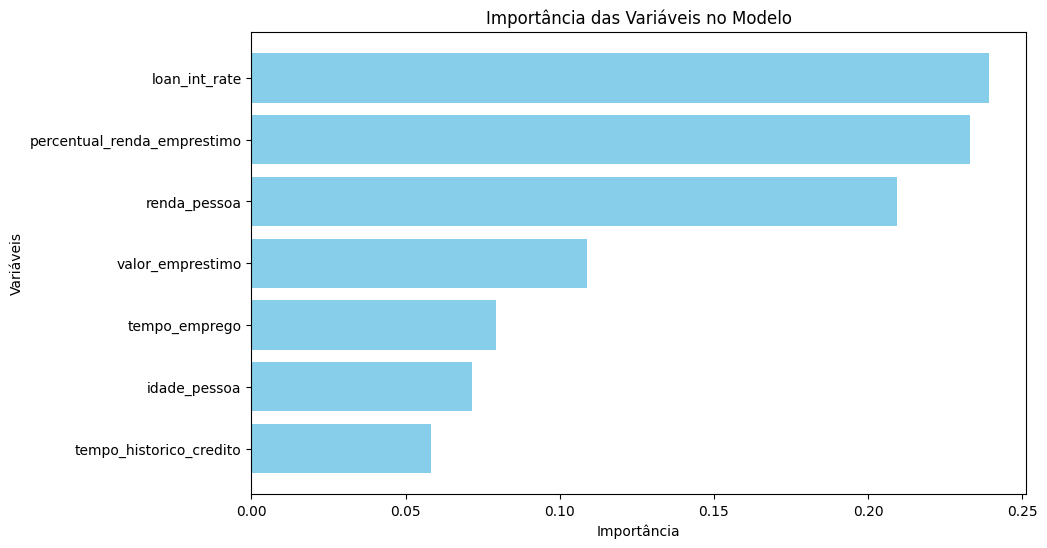

In [116]:
# Filtrando as colunas numéricas
df_numerico = df_credito.select_dtypes(include=[np.number])

# Separando as variáveis independentes (X) e a variável dependente (y)
X = df_numerico.drop(columns='status_emprestimo')
y = df_numerico['status_emprestimo']

# Criando o modelo RandomForest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
modelo.fit(X, y)

# Extraindo a importância das features
importancias = modelo.feature_importances_

# Criando um DataFrame para facilitar a visualização
features = pd.DataFrame({'Variáveis': X.columns, 'Importância': importancias})
features = features.sort_values(by='Importância', ascending=False)

# Plotando o gráfico de Importância das Variáveis
plt.figure(figsize=(10, 6))
plt.barh(features['Variáveis'], features['Importância'], color='skyblue')
plt.title('Importância das Variáveis no Modelo')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.gca().invert_yaxis()  # Inverte o eixo Y para mostrar a variável mais importante no topo
plt.show()

#### `Modelo Físico - MySQL Workbench`

In [ ]:
-- MODELO FÍSICO - 12082024 - Script.sql

-- Cria o banco de dados 'riscocredito' se ele não existir
CREATE DATABASE IF NOT EXISTS riscocredito;

-- Define o banco de dados 'riscocredito' como o banco de dados atual a ser usado
USE riscocredito;

-- Cria a tabela 'Pessoa' para armazenar informações sobre as pessoas
CREATE TABLE Pessoa (
    id INT PRIMARY KEY AUTO_INCREMENT,  -- Coluna 'id' como chave primária, com incremento automático para identificar unicamente cada pessoa
    idade_pessoa INT NOT NULL,  -- Coluna 'idade_pessoa' para armazenar a idade da pessoa, obrigatória (NOT NULL)
    renda_pessoa DECIMAL(15, 2) NOT NULL,  -- Coluna 'renda_pessoa' para armazenar a renda da pessoa, com até 15 dígitos no total, incluindo 2 casas decimais, obrigatória (NOT NULL)
    propriedade_residencial VARCHAR(50) NOT NULL,  -- Coluna 'propriedade_residencial' para armazenar o tipo de propriedade residencial (como 'Aluguel' ou 'Própria'), com até 50 caracteres, obrigatória (NOT NULL)
    tempo_emprego INT NOT NULL  -- Coluna 'tempo_emprego' para armazenar o tempo de emprego da pessoa em anos, obrigatória (NOT NULL)
);

-- Cria a tabela 'Emprestimo' para armazenar informações sobre os empréstimos
CREATE TABLE Emprestimo (
    id INT PRIMARY KEY AUTO_INCREMENT,  -- Coluna 'id' como chave primária, com incremento automático para identificar unicamente cada empréstimo
    intencao_emprestimo VARCHAR(50) NOT NULL,  -- Coluna 'intencao_emprestimo' para armazenar a finalidade do empréstimo (como 'Carro' ou 'Educação'), com até 50 caracteres, obrigatória (NOT NULL)
    valor_emprestimo DECIMAL(15, 2) NOT NULL,  -- Coluna 'valor_emprestimo' para armazenar o valor do empréstimo, com até 15 dígitos no total, incluindo 2 casas decimais, obrigatória (NOT NULL)
    status_emprestimo VARCHAR(20) NOT NULL,  -- Coluna 'status_emprestimo' para armazenar o status do empréstimo (como 'Em Dia' ou 'Atrasado'), com até 20 caracteres, obrigatória (NOT NULL)
    percentual_renda_emprestimo DECIMAL(5, 2) NOT NULL,  -- Coluna 'percentual_renda_emprestimo' para armazenar o percentual da renda comprometido com o empréstimo, com até 5 dígitos no total, incluindo 2 casas decimais, obrigatória (NOT NULL)
    registro_inadimplencia CHAR(1) NOT NULL,  -- Coluna 'registro_inadimplencia' para armazenar se há registro de inadimplência ('S' para Sim, 'N' para Não), obrigatória (NOT NULL)
    tempo_historico_credito INT NOT NULL,  -- Coluna 'tempo_historico_credito' para armazenar o tempo de histórico de crédito da pessoa em anos, obrigatória (NOT NULL)
    pessoa_id INT,  -- Coluna 'pessoa_id' que serve como chave estrangeira, referenciando a tabela 'Pessoa'
    FOREIGN KEY (pessoa_id) REFERENCES Pessoa(id)  -- Define a chave estrangeira 'pessoa_id' que referencia a coluna 'id' na tabela 'Pessoa'
);

-- Cria a tabela 'HistoricoCredito' para armazenar informações adicionais sobre o histórico de crédito
CREATE TABLE HistoricoCredito (
    id INT PRIMARY KEY AUTO_INCREMENT,  -- Coluna 'id' como chave primária, com incremento automático para identificar unicamente cada registro de histórico de crédito
    pessoa_id INT,  -- Coluna 'pessoa_id' que serve como chave estrangeira, referenciando a tabela 'Pessoa'
    emprestimo_id INT,  -- Coluna 'emprestimo_id' que serve como chave estrangeira, referenciando a tabela 'Emprestimo'
    historico_credito VARCHAR(50) NOT NULL,  -- Coluna 'historico_credito' para armazenar detalhes adicionais do histórico de crédito, com até 50 caracteres, obrigatória (NOT NULL)
    FOREIGN KEY (pessoa_id) REFERENCES Pessoa(id),  -- Define a chave estrangeira 'pessoa_id' que referencia a coluna 'id' na tabela 'Pessoa'
    FOREIGN KEY (emprestimo_id) REFERENCES Emprestimo(id)  -- Define a chave estrangeira 'emprestimo_id' que referencia a coluna 'id' na tabela 'Emprestimo'
);

#### `MODELO CONCEITUAL - MySQL Workbench`

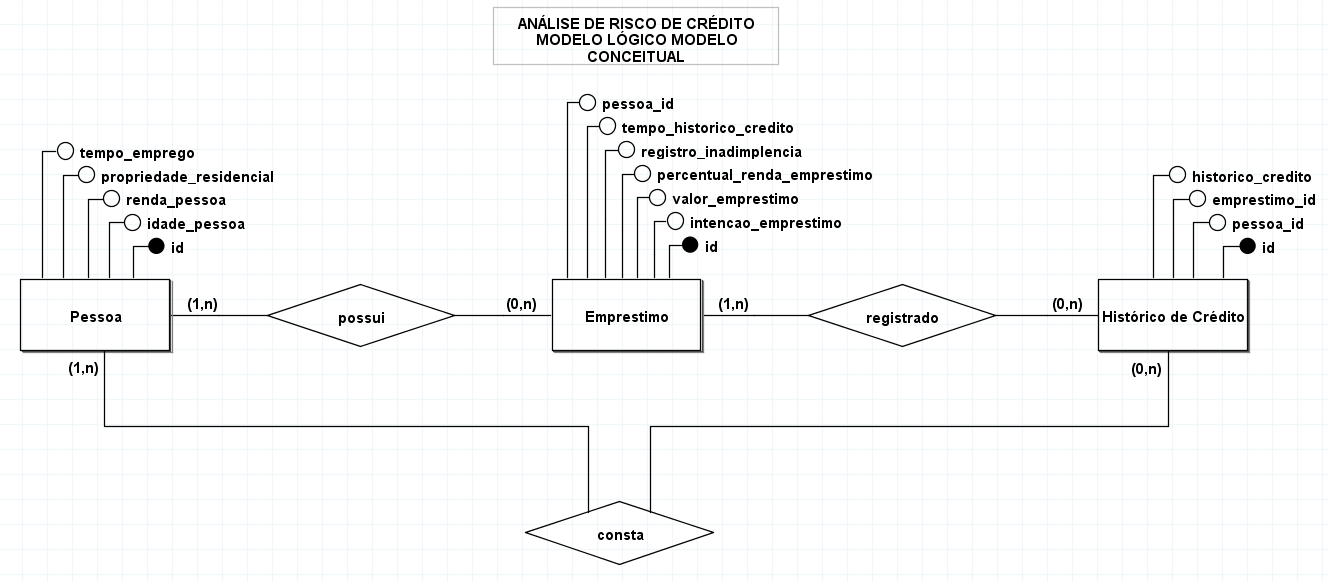

#### `MODELO LÓGICO - MySQL Workbench`

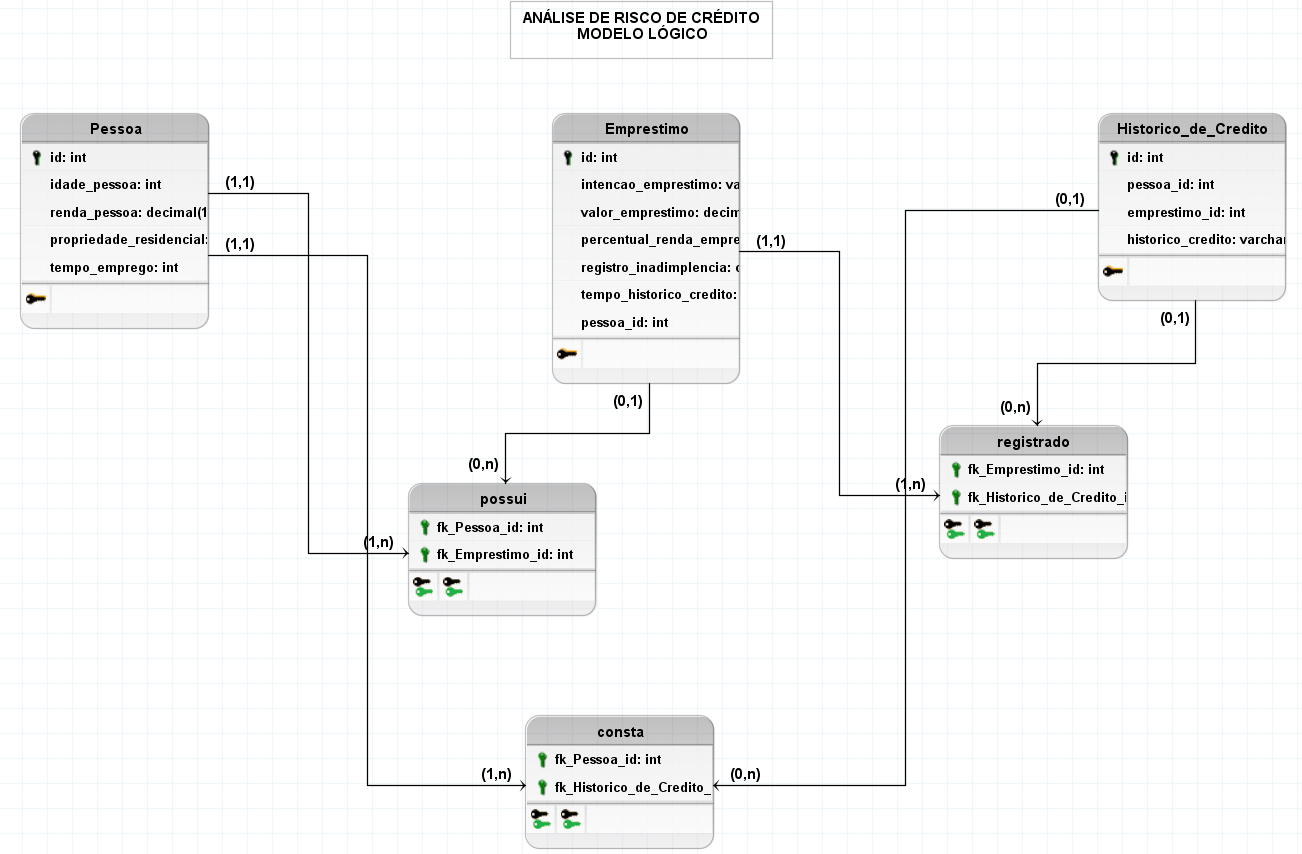